# **Students' Dropout Prediction**

## Authored by: *Team Zenith*

### Team Members: 
1. Raghuveer Harsha Vardhan Karrotu
2. Kiran Kumar Barnala
3. Sai Akarsh Gadikota
4. Adithya Guntupalli 
5. Shilpi Kumari 
6. Sonicaa Kolluri



Introduction


This project aimed to contribute to the reduction of dropouts in higher education by using machine learning techniques. It essentially identifies students at risk of dropping out early in their academic path, allowing support strategies to be implemented. 
The dataset used for this project is from a higher education institution in Portugal that contains information of students at the time of enrolment like demographics, socio-economic factors along with their academic performance during the first year(2 semesters). There is also the status of the student(Droput/Enrolled/Graduate) for each instance.For this project, we customized the target variable as binary classification model (Drop-out or Not Drop-out).

After necessary data cleaning and preprocessing, Classification models will be trained and evaluated using the relevant machine learning algorithms. 


Our prediction task is to determine whether the student will drop-out or not based on various attributes like 
Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate, Inflation rate and GDP).


## Step 1: Install and/or import necessary packages

In [6]:
# Data Manipulation
import pandas as pd
import numpy as np
# Plot Handling/Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocessing data
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,RandomizedSearchCV
# MODELS
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
# Performance measures
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,fbeta_score,make_scorer,confusion_matrix, classification_report,plot_roc_curve, roc_auc_score, roc_curve, auc, RocCurveDisplay, PrecisionRecallDisplay, precision_recall_curve


## Step 2: Preliminary Business Problem Scoping

We are developing a binary classifier to identify if a student is Dropout or not based on the academic performance in the first year and the available demographic information. Below are the various scenarios that are 
anticipated during the model training:

True Positives(TP)- When model predicts the student as "Drop-out" and the actual is also "Drop-out".
True Negatives(TN)- When model predicts the student as "Not Drop-out" and the actual is "Not Drop-out" as well.
False Positives(FP)-When model predicts the student as "Drop-out" when in reality the student is "Not Drop-out".
False Negatives(FN)-When model predicts the student as "Not Drop-out" when in reality the student is "Drop-out".


The model is essentially being developed to solve the drop-out problem in the university wherein the University can intervene with programs like career-couselling,mentorship,alternate class scheduling, online classes etc., to encourage the student complete the course. 
Although, there is a cost for the university (in terms of the additional resources it will have to spend) if there are False Postives,it is relatively less in comparision with False Negatives. The revenue loss due to "drop-outs" far outweighs the cost of additional resources for the interventions by the university.

So, our approach will be to reduce the FNs as much as possible(ideally make them zero). In other words, we aim to maximize the "Recall Score" in the project. However, if there is data imbalance, we will focus on maximizing the "F2 score" which considers both precision and recall with a higher weightage to 'Recall'. The model with high Recall/F2 score is the better performing model.

We will carry out the analysis in two cases. In Case-1, we are intereseted to check whether we can predict the drop-outs only from the admission information(i.e.,attributes collected at the time of enrolment of the students). If we are successful(i.e, if we get good performance scores), the university can engage with the students right from the beginning of the semester. In Case-2, we will carry out the analysis based on the entire data excluding the irrelevant attributes. 


## Step 3: Load, clean and prepare data for analysis

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df = pd.read_csv('/content/drive/MyDrive/Student_data_Mac_2.csv')

### Explore the data

In [9]:
df.shape

(4424, 37)

In [10]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

**From the above, we can see that there are no null values in the dataset**

In [12]:
df.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

## Step 4: Clean and transform data

**Clean the column names**

In [13]:
df.columns = [s.strip().replace(' ', '_') for s in df.columns] 

In [14]:
df = df.rename(columns={'Nacionality': 'Nationality'})


In [15]:
df['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

**Transform multi-class to binary class**

In [16]:
status = []

for i in df['Target']:
    if i == 'Dropout':
        status.append('Drop-out')
    else:
        status.append('Not Drop-out')
        

**Create a new column with binary class values and drop the multi-class column from the dataframe**

In [17]:
df['status'] = status

In [18]:
df.status.unique()

array(['Drop-out', 'Not Drop-out'], dtype=object)

In [19]:
df = df.drop(columns = ['Target'])

In [20]:
category_cols = ['Marital_status','Application_mode','Application_order','Course','Daytime/evening_attendance'
                 ,'Previous_qualification','Nationality',"Mother's_qualification","Father's_qualification"
                 ,"Mother's_occupation","Father's_occupation",'Displaced','Educational_special_needs'
                 ,'Debtor','Tuition_fees_up_to_date','Gender','Scholarship_holder'
                 ,'International']

**Encode the Target variable**

In [21]:
df.status = df.status.replace('Not Drop-out', 0, regex=True)
df.status = df.status.replace('Drop-out', 1, regex=True)  

**Transform the datatypes to categorical**

In [22]:
for col in category_cols:
    df[col] = df[col].astype('category')

In [23]:
df.status = df.status.astype('category')

In [24]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime/evening_attendance,Previous_qualification,Previous_qualification_(grade),Nationality,Mother's_qualification,Father's_qualification,...,Curricular_units_2nd_sem_(credited),Curricular_units_2nd_sem_(enrolled),Curricular_units_2nd_sem_(evaluations),Curricular_units_2nd_sem_(approved),Curricular_units_2nd_sem_(grade),Curricular_units_2nd_sem_(without_evaluations),Unemployment_rate,Inflation_rate,GDP,status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0


Note:

There is an ambiguity on the year considered(whether it is during enrolment time/at the time of drop-out)
for the macro-economic factors in the dataset ("Employment rate", "GDP" and "Inflation). 
Hence, the same are dropped for the analysis.


# Case-1: Prediction with only the student data available at the time of enrolment 

(i.e, removing the attributes-student academic performance at the university and macro-economic factors from the analysis)


**Create a dataframe(df_1) with the student attributes available at the time of enrolment**

In [25]:

df_1 = df[['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime/evening_attendance', 'Previous_qualification',
       'Previous_qualification_(grade)', 'Nationality',
       "Mother's_qualification", "Father's_qualification",
       "Mother's_occupation", "Father's_occupation", 'Admission_grade',
       'Displaced', 'Educational_special_needs', 'Debtor',
       'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International','status'
        ]]


**Encoding dummies for the categorical variables**

In [26]:
cat_cols = [col for col in df_1.columns if df_1[col].dtype in ['category']]

cat_cols.remove('status')


In [27]:

df_1 = pd.get_dummies(df_1, columns = cat_cols)


df_1.head()


,Previous_qualification_(grade),Admission_grade,Age_at_enrollment,status,Marital_status_1,Marital_status_2,Marital_status_3,Marital_status_4,Marital_status_5,Marital_status_6,...,Educational_special_needs_0,Educational_special_needs_1,Debtor_0,Debtor_1,Gender_0,Gender_1,Scholarship_holder_0,Scholarship_holder_1,International_0,International_1
0,122.0,127.3,20,1,1,0,0,0,0,0,...,1,0,1,0,0,1,1,0,1,0
1,160.0,142.5,19,0,1,0,0,0,0,0,...,1,0,1,0,0,1,1,0,1,0
2,122.0,124.8,19,1,1,0,0,0,0,0,...,1,0,1,0,0,1,1,0,1,0
3,122.0,119.6,20,0,1,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
4,100.0,141.5,45,0,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


**Visualize the class counts to check for imbalance**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


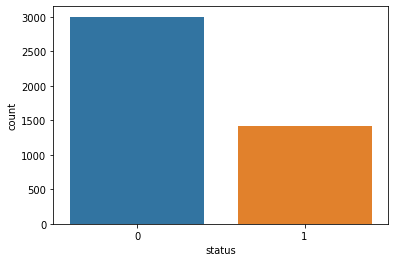

In [28]:
sns.countplot(df_1.status)

**Partition the data into Training and Test sets for model evaluation**

In [29]:

train_df, test_df = train_test_split(df_1, train_size=0.7, random_state=99)
#We've decided to utilize a training/test split of the data at 70% training and 30% testing. This percentage split ratio is inline with common practice for small to medium sized datasets, which this data represents. Moreover, we have decided not to do a three way data split, as we are only testing two models and we wish to allocate as much data as possible to training.



In [30]:

## Step-6: Address Data Imbalances with Oversampling technique

count_0 = (train_df.status==0).sum()
count_1 = (train_df.status==1).sum()

train_df_0 = train_df.loc[train_df.status==0]
train_df_1 = train_df.loc[train_df.status==1]

train_df_1_oversampled = train_df_1.sample((count_0-count_1),replace=True)

train_df = pd.concat([train_df,train_df_1_oversampled],ignore_index = True)


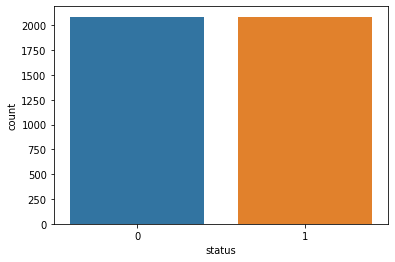

In [31]:

sns.countplot(train_df['status'])



In [32]:
X_train = train_df.drop(columns=['status'])
y_train = train_df['status']
X_test = test_df.drop(columns=['status'])
y_test = test_df['status']

### Training the data on Decision Tree model to ascertain the performance

In [33]:
dtree=DecisionTreeClassifier(random_state=1)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [34]:
y_pred_DT = dtree.predict(X_test)

In [35]:
confusion_matrix(y_test,y_pred_DT)

array([[658, 257],
       [206, 207]])

In [36]:
DT_scores = []
DT_scores.append({ 'Model' : 'Decision Tree',
                'Accuracy': accuracy_score(y_test, y_pred_DT),
                'Precision': precision_score(y_test, y_pred_DT),
                'Recall':recall_score(y_test, y_pred_DT),
                'F1': f1_score(y_test,y_pred_DT),
                'F2': fbeta_score(y_test,y_pred_DT, beta = 2, average = 'binary')
})

In [37]:
DT_scores

[{'Model': 'Decision Tree',
  'Accuracy': 0.651355421686747,
  'Precision': 0.44612068965517243,
  'Recall': 0.5012106537530266,
  'F1': 0.47206385404789053,
  'F2': 0.48913043478260876}]

### Training the data on Random Forest model to ascertain the performance

In [39]:
rforest = RandomForestClassifier(random_state=99)
_ = rforest.fit(X_train, y_train)

In [40]:
y_pred_RF = rforest.predict(X_test)
confusion_matrix(y_test,y_pred_RF)

array([[750, 165],
       [213, 200]])

In [41]:
RF_scores = []
RF_scores.append({ 'Model' : 'Random Forest',
                'Accuracy': accuracy_score(y_test, y_pred_RF),
                'Precision': precision_score(y_test, y_pred_RF),
                'Recall':recall_score(y_test, y_pred_RF),
                'F1': f1_score(y_test,y_pred_RF),
                'F2': fbeta_score(y_test,y_pred_RF, beta = 2, average = 'binary')
})


In [42]:
RF_scores

[{'Model': 'Random Forest',
  'Accuracy': 0.7153614457831325,
  'Precision': 0.547945205479452,
  'Recall': 0.48426150121065376,
  'F1': 0.5141388174807198,
  'F2': 0.49578582052553294}]

### Conclusion for Case-1

Clearly from the above decision tree and Random forest model performance metrics,we can infer that the students' attributes at the time of enrolment has less predictive ability on the drop-out status.

# Case-2 : Model Prediction excluding the macro-economic data attributes like GDP, Unemployment rate and Inflation


Note:
    
There is ambiguity on the year considered (whether it is at the time of enrolment /at the time of student drop-out)
for the macro-economic factors in the dataset("Employment rate", "GDP" and "Inflation).
Hence, the same are being dropped for the analysis.

In [43]:
df = df.drop(df.columns[[33,34,35]], axis=1) 

**Encoding dummies for the categorical variables**

In [44]:
df = pd.get_dummies(df, columns = category_cols)
df.head()

,Previous_qualification_(grade),Admission_grade,Age_at_enrollment,Curricular_units_1st_sem_(credited),Curricular_units_1st_sem_(enrolled),Curricular_units_1st_sem_(evaluations),Curricular_units_1st_sem_(approved),Curricular_units_1st_sem_(grade),Curricular_units_1st_sem_(without_evaluations),Curricular_units_2nd_sem_(credited),...,Debtor_0,Debtor_1,Tuition_fees_up_to_date_0,Tuition_fees_up_to_date_1,Gender_0,Gender_1,Scholarship_holder_0,Scholarship_holder_1,International_0,International_1
0,122.0,127.3,20,0,0,0,0,0.000000,0,0,...,1,0,0,1,0,1,1,0,1,0
1,160.0,142.5,19,0,6,6,6,14.000000,0,0,...,1,0,1,0,0,1,1,0,1,0
2,122.0,124.8,19,0,6,0,0,0.000000,0,0,...,1,0,1,0,0,1,1,0,1,0
3,122.0,119.6,20,0,6,8,6,13.428571,0,0,...,1,0,0,1,1,0,1,0,1,0
4,100.0,141.5,45,0,6,9,5,12.333333,0,0,...,1,0,0,1,1,0,1,0,1,0


**Visualize the class counts to check for imbalance**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


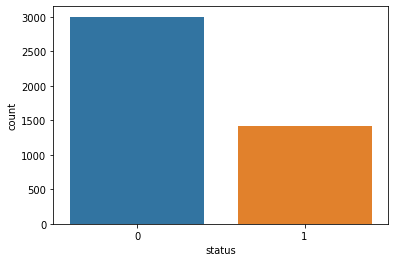

In [45]:
sns.countplot(df['status'])

## Step-5: Partition the data into Training and Test sets for model evaluation

We've decided to utilize a training/test split of the data at 70% training and 30% testing. This percentage split ratio is inline with common practice for small to medium sized datasets, which this data represents. Moreover, we have decided not to do a three way data split as we wish to allocate as much data as possible to training.

In [46]:
train_df, test_df = train_test_split(df, train_size=0.7, random_state=99)

## Step-6: Address Data Imbalances of training set with Oversampling technique

In [47]:
count_0 = (train_df.status==0).sum()
count_1 = (train_df.status==1).sum()

In [48]:
train_df_0 = train_df.loc[train_df.status==0]
train_df_1 = train_df.loc[train_df.status==1]

In [49]:
train_df_1_oversampled = train_df_1.sample((count_0-count_1),replace=True)

In [50]:
train_df = pd.concat([train_df,train_df_1_oversampled],ignore_index = True)

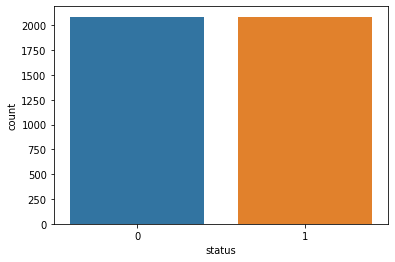

In [51]:
sns.countplot(train_df['status'])

In [52]:
X_train = train_df.drop(columns=['status'])
y_train = train_df['status']
X_test = test_df.drop(columns=['status'])
y_test = test_df['status']

# Step-7: Train the models

### 7(a) Decision Tree with Hyper-Parametric Tuning

In [53]:
# Criterion used to guide data splits
criterion = ['gini', 'entropy','log_loss']

max_depth = [int(x) for x in np.linspace(900, 1200, 50)]
max_depth.append(None)
min_samples_split = [int(x) for x in np.linspace(0, 100, 20)]
min_samples_leaf = [int(x) for x in np.linspace(1, 100, 30)] 
max_leaf_nodes = [int(x) for x in np.linspace(2, len(y_test), 50)]
max_leaf_nodes.append(None)
min_impurity_decrease = [x for x in np.arange(0.0, 0.01, 0.0001).round(5)]


In [54]:
# Create the random grid
param_grid_random = { 'criterion': criterion,
                      'max_depth': max_depth,
                      'min_samples_split': min_samples_split,
                      'min_samples_leaf' : min_samples_leaf,
                      'max_leaf_nodes' : max_leaf_nodes,
                      'min_impurity_decrease' : min_impurity_decrease,
                     }


In [55]:
best_random_search_model = RandomizedSearchCV(
        estimator=DecisionTreeClassifier(random_state=99), 
        scoring='recall', 
        param_distributions=param_grid_random, 
        n_iter = 1500, 
        cv=10, 
        verbose=0, 
        n_jobs = -1
    )
_ = best_random_search_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5430 fits failed out of a total of 15000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4760 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

------------------------------

In [56]:
random_search_best_params = best_random_search_model.best_params_
print('Best parameters found:', random_search_best_params)

Best parameters found: {'min_samples_split': 42, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.0012, 'max_leaf_nodes': 1328, 'max_depth': 1120, 'criterion': 'entropy'}


In [57]:
param_grid = {
    'max_depth': [920,925,930], 
    'min_samples_split': [24,26,28], 
    'min_samples_leaf' : [1,2,3],
    'min_impurity_decrease': [0.0004, 0.0005,0.0006], 
    'criterion': ['gini']
}

In [58]:
best_grid_search_model = GridSearchCV(estimator=DecisionTreeClassifier(random_state=99), 
                                    scoring='recall', param_grid=param_grid, cv=10, verbose=0,  n_jobs = -1)
_ = best_grid_search_model.fit(X_train, y_train)

In [59]:
y_pred_DT = best_grid_search_model.predict(X_test)

In [60]:
confusion_matrix(y_test,y_pred_DT)

array([[804, 111],
       [ 87, 326]])

In [61]:
DT_scores = []
DT_scores.append({ 'Model' : 'Decision Tree',
                'Accuracy': accuracy_score(y_test, y_pred_DT),
                'Precision': precision_score(y_test, y_pred_DT),
                'Recall':recall_score(y_test, y_pred_DT),
                'F1': f1_score(y_test,y_pred_DT),
                'F2': fbeta_score(y_test,y_pred_DT, beta = 2, average = 'binary')
})

In [62]:
Decision_Tree_scores= pd.DataFrame(DT_scores)
Decision_Tree_scores

,Model,Accuracy,Precision,Recall,F1,F2
0,Decision Tree,0.850904,0.745995,0.789346,0.767059,0.780278


### 7(b) Random Forest- Ensemble Technique(Bagging)

In [63]:
rforest = RandomForestClassifier(random_state=99)
_ = rforest.fit(X_train, y_train)

In [64]:
y_pred_RF = rforest.predict(X_test)

In [65]:
confusion_matrix(y_test,y_pred_RF)

array([[857,  58],
       [113, 300]])

In [66]:
RF_scores = []
RF_scores.append({ 'Model' : 'Random Forest',
                'Accuracy': accuracy_score(y_test, y_pred_RF),
                'Precision': precision_score(y_test, y_pred_RF),
                'Recall':recall_score(y_test, y_pred_RF),
                'F1': f1_score(y_test,y_pred_RF),
                'F2': fbeta_score(y_test,y_pred_RF, beta = 2, average = 'binary')
})

In [67]:
Random_Forest_scores= pd.DataFrame(RF_scores)
Random_Forest_scores

,Model,Accuracy,Precision,Recall,F1,F2
0,Random Forest,0.871235,0.837989,0.726392,0.77821,0.746269


### 7(c) AdaBoost

In [68]:
aboost = AdaBoostClassifier(random_state=99)
_ = aboost.fit(X_train, y_train)

In [69]:
y_pred_ADB = aboost.predict(X_test)

In [70]:
confusion_matrix(y_test, y_pred_ADB)

array([[807, 108],
       [ 88, 325]])

In [71]:
ADB = []
ADB.append({ 
                'Model' : 'AdaBoost',
                'Accuracy': accuracy_score(y_test, y_pred_ADB),
                'Precision': precision_score(y_test, y_pred_ADB),
                'Recall':recall_score(y_test, y_pred_ADB),
                'F1': f1_score(y_test,y_pred_ADB),
                'F2': fbeta_score(y_test,y_pred_ADB, beta = 2, average = 'binary')
})

In [72]:
AdaBoost_scores= pd.DataFrame(ADB)
AdaBoost_scores

,Model,Accuracy,Precision,Recall,F1,F2
0,AdaBoost,0.85241,0.750577,0.786925,0.768322,0.779376


### 7(d) Gradient Boost

In [73]:
gboost = GradientBoostingClassifier(random_state=99)
_ = gboost.fit(X_train, y_train)


In [74]:
y_pred_GB = gboost.predict(X_test)

In [75]:
confusion_matrix(y_test, y_pred_GB)

array([[833,  82],
       [ 95, 318]])

In [76]:
GB = []
GB.append({     'Model' : 'Gradient Boost',
                'Accuracy': accuracy_score(y_test, y_pred_GB),
                'Precision': precision_score(y_test, y_pred_GB),
                'Recall':recall_score(y_test, y_pred_GB),
                'F1': f1_score(y_test,y_pred_GB),
                'F2': fbeta_score(y_test,y_pred_GB, beta = 2, average = 'binary')
})

In [77]:
GradBoost_scores= pd.DataFrame(GB)
GradBoost_scores

,Model,Accuracy,Precision,Recall,F1,F2
0,Gradient Boost,0.866717,0.795,0.769976,0.782288,0.774854


### 7(e) K-Nearest Neighbours with Hyper Parameter tuning

In [78]:
#Standardize the data

scaler = StandardScaler()
scaler.fit(X_train)
X_train_KNN = scaler.transform(X_train)
X_test_KNN = scaler.transform(X_test)
y_train_KNN = y_train
y_test_KNN = y_test



In [80]:
#knn
k_fold = 10
param_grid = {
    'n_neighbors': list(range(1,round(len(y_train)**0.5),2)),
    'metric': ['euclidean', 'cosine']    
}


gridSearch = GridSearchCV(KNeighborsClassifier(), param_grid, cv=k_fold, scoring='recall',
                              n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(X_train_KNN, y_train)
print('score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)
best_KNN = gridSearch.best_estimator_
y_pred_KNN = best_KNN.predict(X_test_KNN)


score:  0.9210526315789475
parameters:  {'metric': 'cosine', 'n_neighbors': 1}


In [81]:
KNN = []
for k in range(1,int(len(y_test)**0.5)*2,2):
    knn = KNeighborsClassifier(n_neighbors=k,  metric='cosine')
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    
    KNN.append({ 
                'k':k,
                'Accuracy': accuracy_score(y_test, y_pred_knn),
                'Precision': precision_score(y_test, y_pred_knn),
                'Recall':recall_score(y_test, y_pred_knn),
                'F1': f1_score(y_test,y_pred_GB),
                'F2': fbeta_score(y_test,y_pred_GB, beta = 2, average = 'binary')
        })


In [82]:
KNN_scores_df = pd.DataFrame(KNN)
KNN_scores_df

,k,Accuracy,Precision,Recall,F1,F2
0,1,0.789157,0.675462,0.619855,0.782288,0.774854
1,3,0.787651,0.649203,0.690073,0.782288,0.774854
2,5,0.798946,0.664414,0.714286,0.782288,0.774854
3,7,0.812500,0.686364,0.731235,0.782288,0.774854
4,9,0.828313,0.722892,0.726392,0.782288,0.774854
5,11,0.823795,0.712589,0.726392,0.782288,0.774854
6,13,0.820783,0.707838,0.721550,0.782288,0.774854
7,15,0.814759,0.697400,0.714286,0.782288,0.774854
8,17,0.820030,0.708134,0.716707,0.782288,0.774854
9,19,0.821536,0.713592,0.711864,0.782288,0.774854


In [83]:
KNN_scores_df.loc[KNN_scores_df['Recall'].idxmax()]

k            59.000000
Accuracy      0.806476
Precision     0.673333
Recall        0.733656
F1            0.782288
F2            0.774854
Name: 29, dtype: float64

In [84]:
KNN = []

KNN.append({ 
                'k':k,
                'Accuracy': accuracy_score(y_test, y_pred_knn),
                'Precision': precision_score(y_test, y_pred_knn),
                'Recall':recall_score(y_test, y_pred_knn),
                'F1': f1_score(y_test,y_pred_GB),
                'F2': fbeta_score(y_test,y_pred_GB, beta = 2, average = 'binary')
        })

In [110]:
KNN = []

KNN.append({ 
                'Model':'KNN',
                'Accuracy': 0.816265,
                'Precision': 0.691610,
                'Recall':0.738499,
                'F1': 0.785714,
                'F2': 0.777669
        })

In [111]:
KNN_scores_df_1 = pd.DataFrame(KNN)
KNN_scores_df_1

,Model,Accuracy,Precision,Recall,F1,F2
0,KNN,0.816265,0.69161,0.738499,0.785714,0.777669


### 7(f) XG Boost

In [112]:

xgboost = XGBClassifier(random_state=99)
_ = xgboost.fit(X_train, y_train)


In [88]:
y_pred_XGB = xgboost.predict(X_test)

In [89]:
confusion_matrix(y_test,y_pred_XGB)

array([[834,  81],
       [ 96, 317]])

In [90]:
XGB = []
XGB.append({    'Model' : 'XGBoost',
                'Accuracy': accuracy_score(y_test, y_pred_XGB),
                'Precision': precision_score(y_test, y_pred_XGB),
                'Recall':recall_score(y_test, y_pred_XGB),
                'F1': f1_score(y_test,y_pred_XGB),
                'F2': fbeta_score(y_test,y_pred_XGB, beta = 2, average = 'binary')
})

In [91]:
XGBoost_scores= pd.DataFrame(XGB)
XGBoost_scores

,Model,Accuracy,Precision,Recall,F1,F2
0,XGBoost,0.866717,0.796482,0.767554,0.781751,0.773171


### 7(g) Logistic Regression with Hyper parameter tuning

In [92]:
param_grid_LR = { 'solver': ['newton-cg', 'lbfgs', 'liblinear','sag', 'saga'],
                      'penalty': ['l1', 'l2', 'none'],
                      'C': [100, 10, 1.0, 0.1, 0.01],
                      'max_iter': [1000] 
                     }

In [93]:
best_logClassifier = GridSearchCV(estimator=LogisticRegression(random_state=99),
                                    scoring= 'recall', param_grid=param_grid_LR, 
                                    cv=2, verbose=0,  n_jobs = -1)
best_logClassifier = best_logClassifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

In [94]:
y_pred_LR = best_logClassifier.predict(X_test)

In [95]:
LogReg = []
LogReg.append({ 'Model' : 'Logistic Regression', 
                'Accuracy': accuracy_score(y_test, y_pred_LR),
                'Precision': precision_score(y_test, y_pred_LR),
                'Recall':recall_score(y_test, y_pred_LR),
                'F1': f1_score(y_test,y_pred_LR),
                'F2': fbeta_score(y_test,y_pred_LR, beta = 2, average = 'binary')
})

In [96]:
LogReg_scores= pd.DataFrame(LogReg)
LogReg_scores

,Model,Accuracy,Precision,Recall,F1,F2
0,Logistic Regression,0.857681,0.764151,0.784504,0.774194,0.780347


### 7(h) Artificial Neural Networks(ANN)

In [97]:
param_grid = {
    'hidden_layer_sizes': [(200), (200,100), (200,100,50), (200,100,50,40)], 
    'solver': ['lbfgs','adam', 'sdg'], 
    'activation': ['tanh','relu'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

In [98]:
best_grid_search_model = GridSearchCV(estimator=MLPClassifier(max_iter=100), 
                                    scoring='recall', param_grid=param_grid)
_ = best_grid_search_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

In [99]:
y_pred_ANN = best_grid_search_model.predict(X_test)

In [100]:
confusion_matrix(y_test,y_pred_ANN)

array([[817,  98],
       [103, 310]])

In [101]:
ANN = []
ANN.append({    'Model' : 'Neural Network', 
                'Accuracy': accuracy_score(y_test, y_pred_ANN),
                'Precision': precision_score(y_test, y_pred_ANN),
                'Recall':recall_score(y_test, y_pred_ANN),
                'F1': f1_score(y_test,y_pred_ANN),
                'F2': fbeta_score(y_test,y_pred_ANN, beta = 2, average = 'binary')
})

In [102]:
ANN_scores= pd.DataFrame(ANN)
ANN_scores

,Model,Accuracy,Precision,Recall,F1,F2
0,Neural Network,0.848645,0.759804,0.750605,0.755177,0.752427


In [103]:
best_grid_search_model.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__activation': 'relu',
 'estimator__alpha': 0.0001,
 'estimator__batch_size': 'auto',
 'estimator__beta_1': 0.9,
 'estimator__beta_2': 0.999,
 'estimator__early_stopping': False,
 'estimator__epsilon': 1e-08,
 'estimator__hidden_layer_sizes': (100,),
 'estimator__learning_rate': 'constant',
 'estimator__learning_rate_init': 0.001,
 'estimator__max_fun': 15000,
 'estimator__max_iter': 100,
 'estimator__momentum': 0.9,
 'estimator__n_iter_no_change': 10,
 'estimator__nesterovs_momentum': True,
 'estimator__power_t': 0.5,
 'estimator__random_state': None,
 'estimator__shuffle': True,
 'estimator__solver': 'adam',
 'estimator__tol': 0.0001,
 'estimator__validation_fraction': 0.1,
 'estimator__verbose': False,
 'estimator__warm_start': False,
 'estimator': MLPClassifier(max_iter=100),
 'n_jobs': None,
 'param_grid': {'hidden_layer_sizes': [200,
   (200, 100),
   (200, 100, 50),
   (200, 100, 50, 40)],
  'solver': ['lbfgs', 'adam', 'sdg'],
  'acti

In [104]:
ann = MLPClassifier(hidden_layer_sizes=(250,150,50), solver='lbfgs', max_iter=150)
_ = ann.fit(X_train, y_train)
y_pred_ANN_1 = ann.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
ANN_1 = []
ANN_1.append({  'Model' : 'Neural Network-Final', 
                'Accuracy': accuracy_score(y_test, y_pred_ANN_1),
                'Precision': precision_score(y_test, y_pred_ANN_1),
                'Recall':recall_score(y_test, y_pred_ANN_1),
                'F1': f1_score(y_test,y_pred_ANN_1),
                'F2': fbeta_score(y_test,y_pred_ANN_1, beta = 2, average = 'binary')
})

In [ ]:
ANN_1_scores= pd.DataFrame(ANN_1)
ANN_1_scores

# Step-8: Performance comparision

In [113]:
final = ANN_1_scores.append(ANN_scores).append(XGBoost_scores).append(Decision_Tree_scores).append(Random_Forest_scores).append(AdaBoost_scores).append(GradBoost_scores).append(LogReg_scores).append(KNN_scores_df_1)
#final = pd.concat(XGBoost_scores,ANN_1_scores,ANN_scores)
       


In [114]:
final

,Model,Accuracy,Precision,Recall,F1,F2
0,Neural Network-Final,0.865964,0.779097,0.794189,0.786571,0.791124
0,Neural Network,0.848645,0.759804,0.750605,0.755177,0.752427
0,XGBoost,0.866717,0.796482,0.767554,0.781751,0.773171
0,Decision Tree,0.850904,0.745995,0.789346,0.767059,0.780278
0,Random Forest,0.871235,0.837989,0.726392,0.778210,0.746269
0,AdaBoost,0.852410,0.750577,0.786925,0.768322,0.779376
0,Gradient Boost,0.866717,0.795000,0.769976,0.782288,0.774854
0,Logistic Regression,0.857681,0.764151,0.784504,0.774194,0.780347
0,KNN,0.816265,0.691610,0.738499,0.785714,0.777669


# Step-9: Conclusion

Below is the summary of the analysis:
    
Broadly, the attributes can be classified into three categories:
    1) Student attributes collected at the time of student enrolment into the college
    2) Student academic performance for the first year(2 semesters)
    3) Macro-economic data like Inflation, GDP, Unemployment.
    
Regarding the macro-economic data ("Employment rate", "GDP" and "Inflation), there is ambiguity on the year considered (whether it was at the time of enrolment or at the time of student drop-out).
Hence, the same are being dropped for the analysis.

We considered two cases for our analysis:
    
In Case-1, we considered only the student attributes collected at the time of enrolment. 
In Case-2, we considered all the attributes excluding the macro-economic data.

The primary objective is to identify the drop-outs early in their academic path so that necessary inteventions by the University can be put into place. So, we aim to minimize the False Negatives through our models. Accordingly, the score we have to maximize is 'Recall'.

For the first case, we applied two models to estimate whether we get good performance or not with just the student attributes collected at the time of enrolment so that the University can focus on the potential drop-outs  right from the beginning of the semester. Since, we did not get satisfactory results, we concluded that first year academic performance attributes are crucial to have better results. Accordingly, we considered Case-2 wherein we included all the attributes(excluding the macro-economic data).

Below is the summary of the performance of all models:


| Model      | Accuracy | Precision | Recall | F1 | F2 |
| :----:     |    :----:   |   :----:  |  :----:  |  :----:  |  :----:  |
| Neural Network | 0.865964 | 0.779097 | 0.794189  | 0.786571 | 0.791124 |
| XGBoost | 0.866717 | 0.796482 | 0.767554 | 0.781751 | 0.773171 |
| Decision Tree |0.850904 | 0.745995 | 0.789346 | 0.767059 | 0.780278 |
| Random Forest | 0.871235 | 0.837989 | 0.726392 | 0.778210 | 0.746269 |
| AdaBoost | 0.852410 | 0.750577 | 0.786925 | 0.768322 | 0.779376 |
| Gradient Boost | 0.866717 | 0.795000 | 0.769976 | 0.782288 | 0.774854 |
| Logistic Regression | 0.857681 | 0.764151 | 0.784504 | 0.774194 | 0.780347 |
| KNN | 0.816265 | 0.691610 | 0.738499 | 0.785714 | 0.77769 |


Considering F2 score and recall, Neural Network model performs better than all the models. Also, the accuracy of ANN is comparable to the best accuracy acheived. So, ANN is the best model in this case. A recall of 79.4% in ANN means that the model is able to identify close to 80 out of 100 drop-out students correctly. 

The novelty and the simplicity of this model is that with almost no cost(i.e., only with the basic, available information of the students) the University can identify correctly close to 80 out of 100 potential drop-out students. The university can leverage this information to conduct counselling/mentoring sessions with students, offer alternate class scheduling, recommend courses, tailor the curriculum etc., to retain these students. This way, it is win-win for both the student and the University. Further, it will benefit society at large owing to the postive correlation of tertiary education with the countries'economy.



In [4]:
!pwd


/content


In [10]:
pip install nbconvert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
%%shell
jupyter nbconvert --to html /content/Group_Zenith_Final.ipynb

[NbConvertApp] Converting notebook /content/Group_Zenith_Final.ipynb to html
[NbConvertApp] Writing 600437 bytes to /content/Group_Zenith_Final.html
